In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# sentences = [
#     'I love my dog',
#     'I love my cat',
#     'You love my dog!',
#     'Do you think my dog is amazing?'
# ]

# tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")
# tokenizer.fit_on_texts(sentences)
# word_index = tokenizer.word_index

# sequences = tokenizer.texts_to_sequences(sentences)

# padded = pad_sequences(sequences, padding='post', truncating='post', maxlen=5)
# #padding='post': the zeros will move to the end 
# #truncating='post' with maxlen if smaller than the string (numbers), it will take the beginning
# #otherwise, maxlen will just take the detail
# print(word_index)
# print(sequences)
# print(padded)

In [4]:
# test_data = [
#     'I really love my dog',
#     'my dog loves my manatee'
# ]
# test_seq = tokenizer.texts_to_sequences(test_data)
# print(test_seq)
# print(word_index)

In [5]:
# import json
# with open("/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json", 'r') as f:
#     datastore = json.load(f)
# sentences = []
# labels = []
# urls = []
# for item in datastore:
#     sentences.append(item['headline'])
#     labels.append(item['is_sarcastic'])
#     urls.append(item['article_link'])


In [6]:
datastore = pd.read_json("/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json",
                         lines=True, orient='columns')
datastore.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [7]:
datastore.shape

(26709, 3)

In [8]:
sentences = datastore.headline
labels = datastore.is_sarcastic

In [9]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)

[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)


In [10]:
# print(word_index)

In [11]:
training_size = 20000

In [12]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [13]:
vocab_size = 10000
max_length = 100
padding_type='post'
trunc_type='post'

In [14]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, 
                                padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

In [15]:
embedding_dim = 16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

2022-09-16 12:38:10.097485: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [16]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), verbose=2)

2022-09-16 12:38:10.335057: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
625/625 - 3s - loss: 0.6630 - accuracy: 0.5840 - val_loss: 0.5871 - val_accuracy: 0.8077
Epoch 2/30
625/625 - 2s - loss: 0.4322 - accuracy: 0.8310 - val_loss: 0.3907 - val_accuracy: 0.8305
Epoch 3/30
625/625 - 2s - loss: 0.3123 - accuracy: 0.8787 - val_loss: 0.3566 - val_accuracy: 0.8490
Epoch 4/30
625/625 - 2s - loss: 0.2623 - accuracy: 0.8968 - val_loss: 0.3425 - val_accuracy: 0.8581
Epoch 5/30
625/625 - 2s - loss: 0.2243 - accuracy: 0.9141 - val_loss: 0.3788 - val_accuracy: 0.8338
Epoch 6/30
625/625 - 2s - loss: 0.1965 - accuracy: 0.9259 - val_loss: 0.3556 - val_accuracy: 0.8562
Epoch 7/30
625/625 - 2s - loss: 0.1759 - accuracy: 0.9352 - val_loss: 0.3957 - val_accuracy: 0.8359
Epoch 8/30
625/625 - 2s - loss: 0.1571 - accuracy: 0.9427 - val_loss: 0.3746 - val_accuracy: 0.8538
Epoch 9/30
625/625 - 2s - loss: 0.1412 - accuracy: 0.9499 - val_loss: 0.3907 - val_accuracy: 0.8512
Epoch 10/30
625/625 - 2s - loss: 0.1284 - accuracy: 0.9546 - val_loss: 0.4443 - val_accuracy: 0.8350

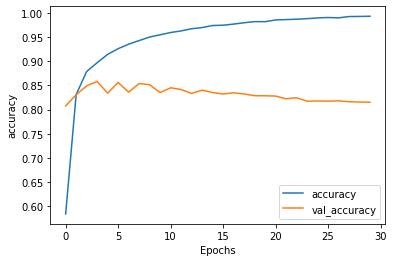

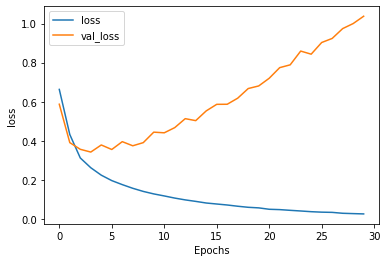

In [17]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [18]:
sentence = ["granny starting to fear spiders in the garden might be real",
            "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[8.4530985e-01]
 [1.2913682e-05]]
